# Classify a Cancer diagnosis using different classifications

### Fetch The data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("cancer.csv")

In [3]:
df.head()

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,diagnosis
0,17.99,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,Malignant
1,20.57,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,Malignant
2,19.69,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,Malignant
3,11.42,77.58,386.1,0.14250,0.28390,0.2414,0.2597,Malignant
4,20.29,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,Malignant


### Data Cleaning

In [4]:
df.shape

(569, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   radius_mean       569 non-null    float64
 1   perimeter_mean    569 non-null    float64
 2   area_mean         569 non-null    float64
 3   smoothness_mean   569 non-null    float64
 4   compactness_mean  569 non-null    float64
 5   concavity_mean    569 non-null    float64
 6   symmetry_mean     569 non-null    float64
 7   diagnosis         569 non-null    object 
dtypes: float64(7), object(1)
memory usage: 35.7+ KB


### Data analysis

In [6]:
df.corr(numeric_only=True)

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean
radius_mean,1.000000,0.997855,0.987357,0.170581,0.506124,0.676764,0.147741
perimeter_mean,0.997855,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027
area_mean,0.987357,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293
smoothness_mean,0.170581,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775
compactness_mean,0.506124,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641
concavity_mean,0.676764,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667
symmetry_mean,0.147741,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>],
       [<Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>],
       [<Axes: title={'center': 'symmetry_mean'}>, <Axes: >, <Axes: >]],
      dtype=object)

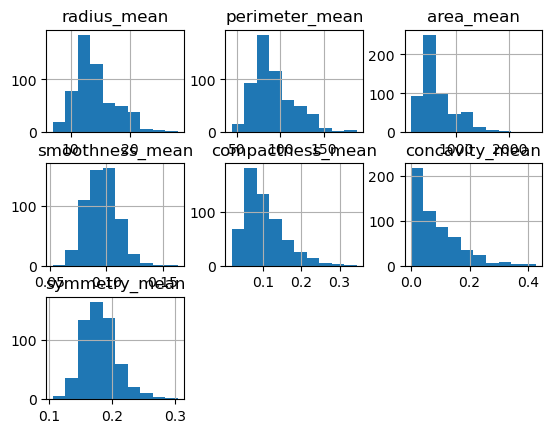

In [7]:
df.hist()

In [8]:
df.diagnosis.value_counts()

diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64

In [9]:
df.describe()

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.096360,0.104341,0.088799,0.181162
std,3.524049,24.298981,351.914129,0.014064,0.052813,0.079720,0.027414
min,6.981000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000
25%,11.700000,75.170000,420.300000,0.086370,0.064920,0.029560,0.161900
50%,13.370000,86.240000,551.100000,0.095870,0.092630,0.061540,0.179200
75%,15.780000,104.100000,782.700000,0.105300,0.130400,0.130700,0.195700
max,28.110000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000


In [10]:
df = df.drop(['id'], axis = 1)

KeyError: "['id'] not found in axis"

In [11]:
df = df.drop(['Unnamed: 32'], axis = 1)

KeyError: "['Unnamed: 32'] not found in axis"

In [12]:
df.describe()

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.096360,0.104341,0.088799,0.181162
std,3.524049,24.298981,351.914129,0.014064,0.052813,0.079720,0.027414
min,6.981000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000
25%,11.700000,75.170000,420.300000,0.086370,0.064920,0.029560,0.161900
50%,13.370000,86.240000,551.100000,0.095870,0.092630,0.061540,0.179200
75%,15.780000,104.100000,782.700000,0.105300,0.130400,0.130700,0.195700
max,28.110000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000


### Identify the input and output

In [13]:
y = df.diagnosis

In [14]:
x = df.drop(columns=["diagnosis"])


In [16]:
y.head()

0    Malignant
1    Malignant
2    Malignant
3    Malignant
4    Malignant
Name: diagnosis, dtype: object

In [17]:
x.head()

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean
0,17.99,122.80,1001.0,0.11840,0.27760,0.3001,0.2419
1,20.57,132.90,1326.0,0.08474,0.07864,0.0869,0.1812
2,19.69,130.00,1203.0,0.10960,0.15990,0.1974,0.2069
3,11.42,77.58,386.1,0.14250,0.28390,0.2414,0.2597
4,20.29,135.10,1297.0,0.10030,0.13280,0.1980,0.1809


### Choose the algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier()

### Traing the model

In [20]:
model.fit(x,y)

KNeighborsClassifier()

### Check the Accuracy

In [21]:
model.score(x,y)

0.9050966608084359

### Predict using the training Model

In [22]:
model.predict([x.iloc[4]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Malignant'], dtype=object)

In [23]:
for neighbour_count in range(1,15):
    model = KNeighborsClassifier(n_neighbors = neighbour_count)
    print(neighbour_count," -> ", model.fit(x,y).score(x,y))

1  ->  1.0
2  ->  0.9068541300527241
3  ->  0.9244288224956063
4  ->  0.9050966608084359
5  ->  0.9050966608084359
6  ->  0.8980667838312829
7  ->  0.8963093145869947
8  ->  0.8963093145869947
9  ->  0.8963093145869947
10  ->  0.8927943760984183
11  ->  0.8927943760984183
12  ->  0.8927943760984183
13  ->  0.8927943760984183
14  ->  0.8927943760984183


In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x,y)
model.score(x,y)

1.0

In [25]:
for depth in range(1,15):
    model = DecisionTreeClassifier(max_depth= depth)
    print(depth," -> ", model.fit(x,y).score(x,y))

1  ->  0.8945518453427065
2  ->  0.9209138840070299
3  ->  0.945518453427065
4  ->  0.961335676625659
5  ->  0.9753954305799648
6  ->  0.9806678383128296
7  ->  0.9859402460456942
8  ->  0.9947275922671354
9  ->  0.9947275922671354
10  ->  0.9982425307557118
11  ->  1.0
12  ->  1.0
13  ->  1.0
14  ->  1.0
